# Food Classification with Deep Learning in Keras / Tensorflow
## *Computer, what am I eating anyway?*

![https://www.flickr.com/photos/torley/3294481634](https://c1.staticflickr.com/4/3360/3294481634_48b2b5baea_b.jpg)

In [ ]:
from IPython.display import HTML, Image

url = 'http://stratospark.com/demos/food-101/'
el = '<' + 'iframe src="{}"'.format(url) + ' width="100%" height=600></iframe>' # prevent notebook render bug
HTML(el)

If you are reading this on GitHub, the demo looks like this. Please follow the link below to view the live demo on my blog.

In [ ]:
Image('demo.jpg')

**Demo available @ [http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html](http://blog.stratospark.com/deep-learning-applied-food-classification-deep-learning-keras.html)**

**Code available @ [https://github.com/stratospark/food-101-keras](https://github.com/stratospark/food-101-keras)**

**UPDATES**

* **2017-03-22** Learn how to use this model in a mobile app: http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html

---

* [Introduction](#Introduction)
    * [Project Description](#Project-Description)
    * [Approach](#Approach)
    * [Results](#Results)
    * [Thoughts](#Thoughts)
* [Experiment](#Experiment)
    * [Loading and Preprocessing Dataset](#Loading-and-Preprocessing-Dataset)
    * [Visualization Tools](#Visualization-Tools)
    * [Image Augmentation](#Image-Augmentation)
    * [Training](#Training)
    * [Model Evaluation](#Model-Evaluation)
    * [Results Visualization](#Results-Visualization)
    * [Interactive Classification](#Interactive-Classification)
    * [Keras.js Export](#Keras.js-Export)

## Introduction

Convolutional Neural Networks (CNN), a technique within the broader Deep Learning field, have been a revolutionary force in Computer Vision applications, especially in the past half-decade or so. One main use-case is that of image classification, e.g. determining whether a picture is that of a dog or cat. 

![Convolutional Neural Network](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

You don't have to limit yourself to a binary classifier of course; CNNs can easily scale to thousands of different classes, as seen in the well-known ImageNet dataset of 1000 classes, used to benchmark computer vision algorithm performance.

<div style='margin: auto; width: 75%;'>
<img style='display: inline;' src='https://upload.wikimedia.org/wikipedia/commons/a/a4/TensorFlowLogo.png'/>
<img style='display: inline;' src='https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg'/>
</div>

In the past couple of years, these cutting edge techniques have started to become available to the broader software development community. Industrial strength packages such as [Tensorflow](https://www.tensorflow.org/) have given us the same building blocks that Google uses to write deep learning applications for embedded/mobile devices to scalable clusters in the cloud -- *Without having to handcode the GPU matrix operations, partial derivative gradients, and stochastic optimizers that make efficient applications possible.*

On top of all of this, are user-friendly APIs such as [Keras](https://keras.io/) that abstract away some of the lower level details and allow us to focus on rapidly prototyping a deep learning computation graph. Much like we would mix and match Legos to get a desired result.

### Project Description

As an introductory project for myself, I chose to use a pre-trained image classifier that comes with Keras, and retrain it on a dataset that I find interesting. I'm very much into good food and home cooking, so something along those lines was appetizing.

In the paper, [Food-101 – Mining Discriminative Components with Random Forests](https://www.vision.ee.ethz.ch/datasets_extra/food-101/), they introduce the Food-101 dataset. There are 101 different classes of food, with 1000 labeled images per class available for supervised training. 

![Food-101 cover image](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

### Approach

I was inspired by this Keras blog post: [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), and a related script I found on github: [keras-finetuning](https://github.com/danielvarga/keras-finetuning).

I built a system recently for the purpose of experimenting with Deep Learning. The key components are an Nvidia Titan X Pascal w/12 GB of memory, 96 GB of system RAM, as well as a 12-core Intel Core i7. It is running 64-bit Ubuntu 16.04 and using the Anaconda Python distribution. Unfortunately, you won't be able to follow along with this notebook on your own system unless you have enough RAM. In the future, I would like to learn how to handle larger than RAM datasets in a performant way. **Please get in touch if you have any ideas!**

I've spent about 1 month on and off building this project, trying to train dozens of models and exploring various areas such as multiprocessing for faster image augmentation. This is a cleaned up version of the notebook that contains my best performing model as of Jan 22, 2017.

### Results

After fine-tuning a pre-trained Google [InceptionV3](https://keras.io/applications/#inceptionv3) model, I was able to achieve about **82.03% Top-1 Accuracy** on the test set using a single crop per item. Using 10 crops per example and taking the most frequent predicted class(es), I was able to achieve **86.97% Top-1 Accuracy** and **97.42% Top-5 Accuracy**

Others have been able to achieve more accurate results:
* **InceptionV3: 88.28% Top-1 Accuracy** with unknown-crops. [Hassannejad, Hamid, et al. "Food Image Recognition Using Very Deep Convolutional Networks." Proceedings of the 2nd International Workshop on Multimedia Assisted Dietary Management. ACM, 2016.](http://dl.acm.org/citation.cfm?id=2986042)
* **ResNet200: 90.14% Top-1 Accuracy** on the Food-101 dataset augmented with 19 Korean dishes. [NVIDIA DEEP LEARNING CONTEST 2016, Keun-dong Lee, DaUn Jeong, Seungjae Lee, Hyung Kwan Son (ETRI VisualBrowsing Team), Oct.7, 2016.](https://www.gputechconf.co.kr/assets/files/presentations/2-1650-1710_DL_Contest_%EC%A7%80%EC%A0%95%EC%A3%BC%EC%A0%9C_%EB%8C%80%EC%83%81.pdf)
* **WISeR: 90.27% Top-1 Accuracy** with 10-crops. [Martinel, Niki, Gian Luca Foresti, and Christian Micheloni. "Wide-Slice Residual Networks for Food Recognition." arXiv preprint arXiv:1612.06543 (2016).](https://arxiv.org/pdf/1612.06543.pdf)

### Thoughts

* Loading a large amount of data into memory, how to avoid?
* Saving the data into h5py file for out of band processing?
* Using Dask for distributed processing?
* Improving multiprocessing image augmentation?

---
* Exporting to Tensorflow [mobile app](https://www.tensorflow.org/mobile/)? 

**Implemented! Check out: http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html**

## Experiment

### Loading and Preprocessing Dataset

Let's import all of the packages needed for the rest of the notebook:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
# from scipy.misc import imresize
from skimage.transform import resize

%matplotlib inline

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

print("imports success")

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

imports success


Download the dataset and extract it within the notebook folder. It may be easier to do this in a separate terminal window.

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

In [ ]:
# !tar xzvf food-101.tar.gz

Let's see what sort of foods are represented here:

In [3]:
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheese_plate	    grilled_salmon	     risotto
cheesecake	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [4]:
!ls food-101/images/apple_pie/ | head -10

1005649.jpg
1011328.jpg
101251.jpg
1014775.jpg
1026328.jpg
1028787.jpg
1034399.jpg
103801.jpg
1038694.jpg
1043283.jpg


Let's look at some random images from each food class. You can right click and open the image in a new window or save it in order to see it at a higher resolution.

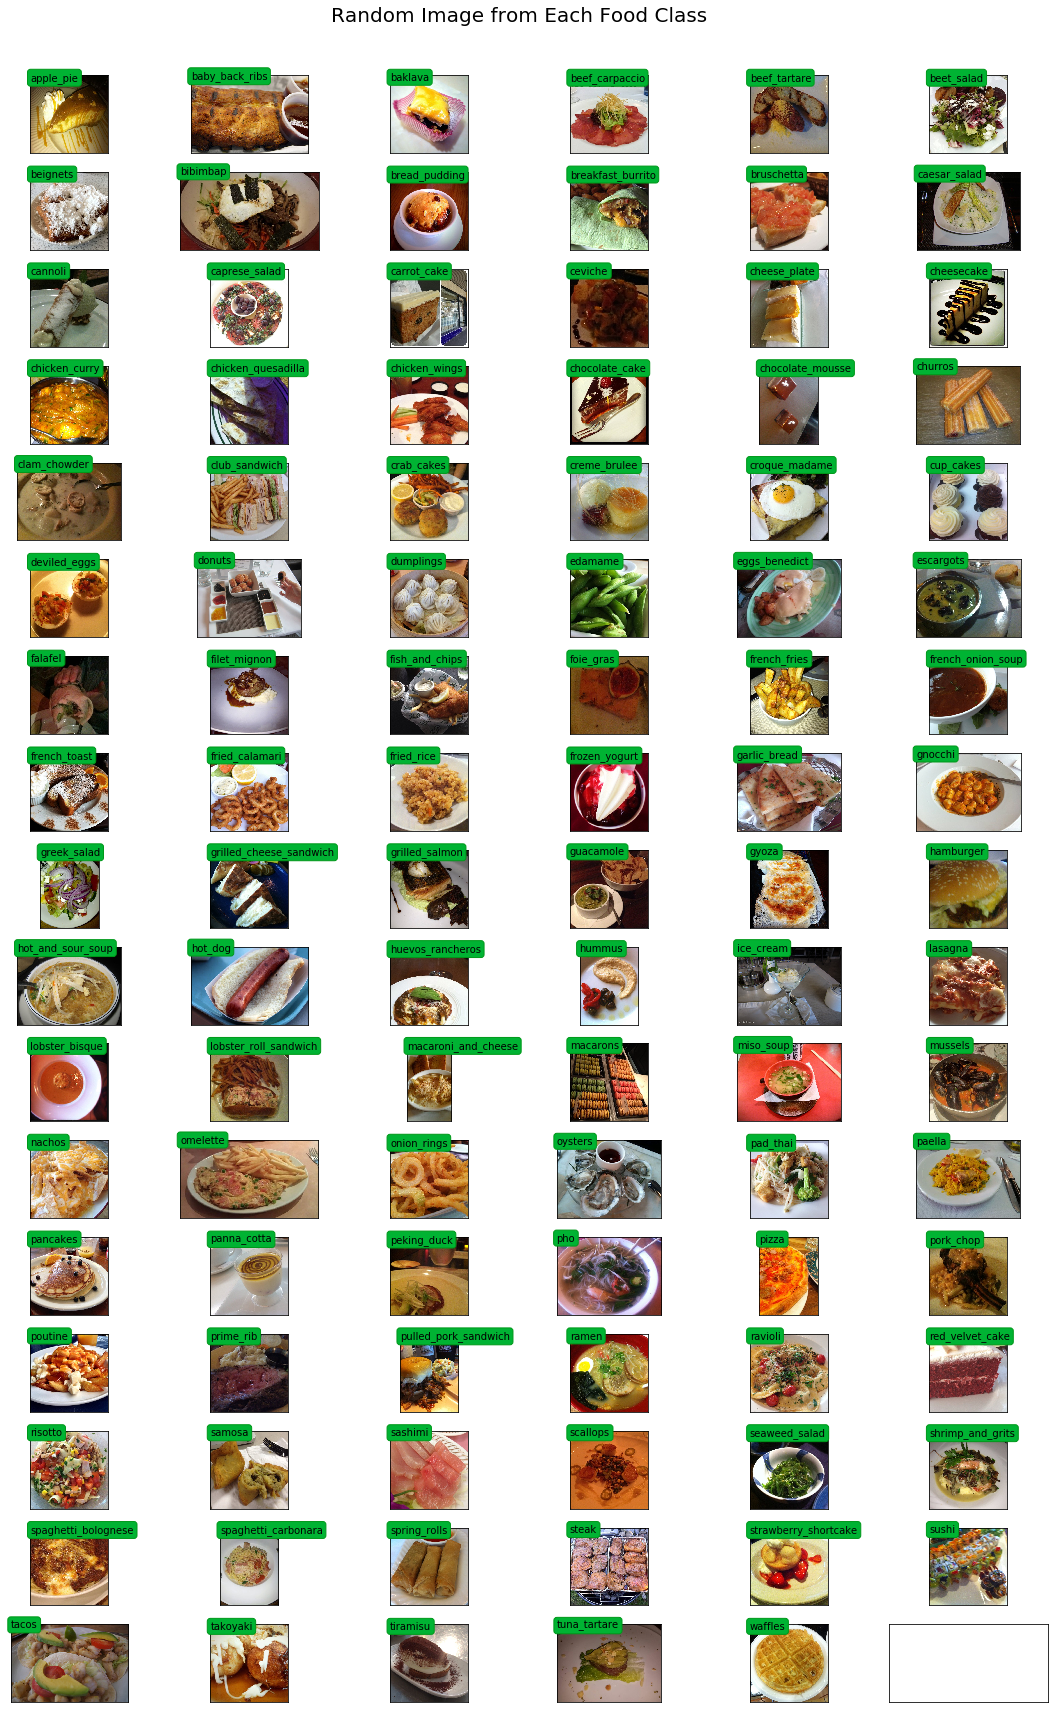

In [5]:
root_dir = 'food-101/images/'
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        cur_img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(cur_img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

A `multiprocessing.Pool` will be used to accelerate image augmentation during training.

In [6]:
# Setup multiprocessing pool
# Do this early, as once images are loaded into memory there will be Errno 12
# http://stackoverflow.com/questions/14749897/python-multiprocessing-memory-usage
import multiprocessing as mp

num_processes = 6
pool = mp.Pool(processes=num_processes)

We need maps from class to index and vice versa, for proper label encoding and pretty printing.

In [7]:
class_to_ix = {}
ix_to_class = {}
with open('food-101/meta/classes.txt', 'r') as txt:
    classes = [l.strip() for l in txt.readlines()]
    class_to_ix = dict(zip(classes, range(len(classes))))
    ix_to_class = dict(zip(range(len(classes)), classes))
    class_to_ix = {v: k for k, v in ix_to_class.items()}
sorted_class_to_ix = collections.OrderedDict(sorted(class_to_ix.items()))

The Food-101 dataset has a provided train/test split. We want to use this in order to compare our classifcation performance with other implementations.

In [8]:
# Only split files if haven't already
if not os.path.isdir('./food-101/test') and not os.path.isdir('./food-101/train'):

    def copytree(src, dst, symlinks = False, ignore = None):
        if not os.path.exists(dst):
            os.makedirs(dst)
            shutil.copystat(src, dst)
        lst = os.listdir(src)
        if ignore:
            excl = ignore(src, lst)
            lst = [x for x in lst if x not in excl]
        for item in lst:
            s = os.path.join(src, item)
            d = os.path.join(dst, item)
            if symlinks and os.path.islink(s):
                if os.path.lexists(d):
                    os.remove(d)
                os.symlink(os.readlink(s), d)
                try:
                    st = os.lstat(s)
                    mode = stat.S_IMODE(st.st_mode)
                    os.lchmod(d, mode)
                except:
                    pass # lchmod not available
            elif os.path.isdir(s):
                copytree(s, d, symlinks, ignore)
            else:
                shutil.copy2(s, d)

    def generate_dir_file_map(path):
        dir_files = defaultdict(list)
        with open(path, 'r') as txt:
            files = [l.strip() for l in txt.readlines()]
            for f in files:
                dir_name, id = f.split('/')
                dir_files[dir_name].append(id + '.jpg')
        return dir_files

    train_dir_files = generate_dir_file_map('food-101/meta/train.txt')
    test_dir_files = generate_dir_file_map('food-101/meta/test.txt')


    def ignore_train(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = train_dir_files[subdir]
        return to_ignore

    def ignore_test(d, filenames):
        print(d)
        subdir = d.split('/')[-1]
        to_ignore = test_dir_files[subdir]
        return to_ignore

    copytree('food-101/images', 'food-101/test', ignore=ignore_train)
    copytree('food-101/images', 'food-101/train', ignore=ignore_test)
    
else:
    print('Train/Test files already copied into separate folders.')

Train/Test files already copied into separate folders.


We are now ready to load the training and testing images into memory. After everything is loaded, about 80 GB of memory will be allocated.

Any images that have a width or length smaller than `min_size` will be resized. This is so that we can take proper-sized crops during image augmentation.

In [ ]:
%%time

# Load dataset images and resize to meet minimum width and height pixel size
def load_images(root, min_side=299, index_from=0, index_to=10):
    all_imgs = []
    all_classes = []
    resize_count = 0
    invalid_count = 0
    for i, subdir in enumerate(listdir(root)):
        if i < index_from:
            continue
        if i >= index_to:
            break
        imgs = listdir(join(root, subdir))
        class_ix = class_to_ix[subdir]
        print(i, class_ix, subdir)
        for img_name in imgs:
            img_arr = img.imread(join(root, subdir, img_name))
            img_arr_rs = img_arr
            try:
                w, h, _ = img_arr.shape
                if w < min_side:
                    wpercent = (min_side/float(w))
                    hsize = int((float(h)*float(wpercent)))
                    #print('new dims:', min_side, hsize)
                    # img_arr_rs = imresize(img_arr, (min_side, hsize))
                    img_arr_rs = resize(img_arr, (min_side, hsize))
                    resize_count += 1
                elif h < min_side:
                    hpercent = (min_side/float(h))
                    wsize = int((float(w)*float(hpercent)))
                    #print('new dims:', wsize, min_side)
                    # img_arr_rs = imresize(img_arr, (wsize, min_side))
                    img_arr_rs = resize(img_arr, (wsize, min_side))
                    resize_count += 1
                all_imgs.append(img_arr_rs)
                all_classes.append(class_ix)
            except:
                print('Skipping bad image: ', subdir, img_name)
                invalid_count += 1
    print(len(all_imgs), 'images loaded')
    print(resize_count, 'images resized')
    print(invalid_count, 'images skipped')
    return np.array(all_imgs), np.array(all_classes)

0 58 ice_cream
1 49 grilled_cheese_sandwich
2 76 pizza
3 7 bibimbap
4 62 macaroni_and_cheese
5 63 macarons
6 15 ceviche
7 30 deviled_eggs
8 68 onion_rings
9 100 waffles
10 43 fried_calamari
11 12 cannoli
12 37 filet_mignon
13 0 apple_pie
14 50 grilled_salmon
15 86 sashimi


Load the test set

In [ ]:
X_test, y_test = load_images('food-101/test', min_side=299)

Load the training set

In [ ]:
%%time
X_train, y_train = load_images('food-101/train', min_side=299)

In [ ]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

### Visualization Tools

In [ ]:
@interact(n=(0, len(X_train)))
def show_pic(n):
    plt.imshow(X_train[n])
    print('class:', y_train[n], ix_to_class[y_train[n]])

In [ ]:
@interact(n=(0, len(X_test)))
def show_pic(n):
    plt.imshow(X_test[n])
    print('class:', y_test[n], ix_to_class[y_test[n]])

In [ ]:
@interact(n_class=sorted_class_to_ix)
def show_random_images_of_class(n_class=0):
    print(n_class)
    nrows = 4
    ncols = 8
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    imgs = np.random.choice((y_train == n_class).nonzero()[0], nrows * ncols)
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(X_train[imgs[i]])
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
    plt.subplots_adjust(left=0, wspace=0, hspace=0)
    plt.show()


In [ ]:
@interact(n_class=sorted_class_to_ix)
def show_random_images_of_class(n_class=0):
    print(n_class)
    nrows = 4
    ncols = 8
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    imgs = np.random.choice((y_test == n_class).nonzero()[0], nrows * ncols)
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(X_test[imgs[i]])
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
    plt.subplots_adjust(left=0, wspace=0, hspace=0)
    plt.show()


### Image Augmentation

We need to one-hot encode each label value to create a vector of binary features rather than one feature that can take on `n_classes` values.

In [ ]:
from keras.utils.np_utils import to_categorical

n_classes = 101
y_train_cat = to_categorical(y_train, nb_classes=n_classes)
y_test_cat = to_categorical(y_test, nb_classes=n_classes)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Input

import tools.image_gen_extended as T

# Useful for checking the output of the generators after code change
#from importlib import reload
#reload(T)

I needed to have a more powerful Image Augmentation pipeline than the one that ships with Keras. Luckily, I was able to find this [modified version](https://github.com/fchollet/keras/issues/3338) to use as my base. 

The author had added an extensible pipeline, which made it possible to specify additional modifications such as custom cropping functions and being able to use the Inception image preprocessor. Being able to apply preprocessing dynamically was necessary, as I did not have enough memory to keep all of the training set as `float32s`. I was able to load the entire training set as `uint8s`.

Furthermore, I was not fully utilizing either my GPU or my multicore CPU. By default, Python is only able to use a single core, thereby limiting the amount of processed/augmented images I could send to the GPU for training. Based on some performance monitoring, I was only using a small percentage of the GPU on average. By incorporating a python `multiprocessing Pool`, I was able to get about 50% CPU utilization and 90% GPU utilization.

The end result is that each epoch of training went from 45 minutes to 22 minutes! You can run the GPU graphs yourselves while training in this [notebook](nvidia-gpu-monitor.ipynb). The inspiration for trying to improve data augmentation and GPU performance came from [Jimmie Goode: Buffered Python generators for data augmentation](http://jimgoo.com/buffered-gens/)

At the moment, the code is fairly buggy and requires restarting the Python kernel whenever training is manually interrupted. The code is quite hacked together and certain features, like those that involve fitting, are disabled. I hope to improve this ImageDataGenerator and release it to the community in the future.

In [ ]:
display(Image('./gpu.png'))

In [ ]:
%%time

# this is the augmentation configuration we will use for training
train_datagen = T.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    zoom_range=[.8, 1],
    channel_shift_range=30,
    fill_mode='reflect')
train_datagen.config['random_crop_size'] = (299, 299)
train_datagen.set_pipeline([T.random_transform, T.random_crop, T.preprocess_input])
train_generator = train_datagen.flow(X_train, y_train_cat, batch_size=64, seed=11, pool=pool)

In [ ]:
test_datagen = T.ImageDataGenerator()
test_datagen.config['random_crop_size'] = (299, 299)
test_datagen.set_pipeline([T.random_transform, T.random_crop, T.preprocess_input])
test_generator = test_datagen.flow(X_test, y_test_cat, batch_size=64, seed=11, pool=pool)

We can see what sorts of images are coming out of these ImageDataGenerators:

In [ ]:
def reverse_preprocess_input(x0):
    x = x0 / 2.0
    x += 0.5
    x *= 255.
    return x

In [ ]:
%%time
@interact()
def show_images(unprocess=True):
    for x in test_generator:
        fig, axes = plt.subplots(nrows=8, ncols=4)
        fig.set_size_inches(8, 8)
        page = 0
        page_size = 32
        start_i = page * page_size
        for i, ax in enumerate(axes.flat):
            img = x[0][i+start_i]
            if unprocess:
                im = ax.imshow( reverse_preprocess_input(img).astype('uint8') )
            else:
                im = ax.imshow(img)
            ax.set_axis_off()
            ax.title.set_visible(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            for spine in ax.spines.values():
                spine.set_visible(False)

        plt.subplots_adjust(left=0, wspace=0, hspace=0)
        plt.show()
        break

In [ ]:
%%time
show_images(unprocess=False)

### Training

We will be retraining a Google InceptionV3 model, pretrained on ImageNet. The neural network architecture is shown below.

![https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html](https://4.bp.blogspot.com/-TMOLlkJBxms/Vt3HQXpE2cI/AAAAAAAAA8E/7X7XRFOY6Xo/s1600/image03.png)

In [ ]:
%%time
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
import keras.backend as K
import math

K.clear_session()

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(299, 299, 3)))
x = base_model.output
x = AveragePooling2D(pool_size=(8, 8))(x)
x = Dropout(.4)(x)
x = Flatten()(x)
predictions = Dense(n_classes, init='glorot_uniform', W_regularizer=l2(.0005), activation='softmax')(x)

model = Model(input=base_model.input, output=predictions)

opt = SGD(lr=.01, momentum=.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model4.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('model4.log')

def schedule(epoch):
    if epoch < 15:
        return .01
    elif epoch < 28:
        return .002
    else:
        return .0004
lr_scheduler = LearningRateScheduler(schedule)

model.fit_generator(train_generator,
                    validation_data=test_generator,
                    nb_val_samples=X_test.shape[0],
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=32,
                    verbose=2,
                    callbacks=[lr_scheduler, csv_logger, checkpointer])

At this point, we are seeing up to 81.65 single crop Top-1 accuracy on the test set. We can continue to train the model at an even slower learning rate to see if it improves more.

My initial experiments used more modern optimizers such as Adam and AdaDelta, along with higher learning rates. I was stuck for a while below 80% accuracy before I decided to follow the literature more closely and use Stochastic Gradient Descent (SGD) with a quickly decreasing learning schedule. When we are searching through the multidimensional surface, sometimes going slower goes a long way.

<img src='https://upload.wikimedia.org/wikipedia/commons/6/68/Gradient_ascent_(surface).png' alt='https://commons.wikimedia.org/wiki/File:Gradient_ascent_(surface).png'/>

Due to some instability with my multiprocessing code, sometimes I need to restart the notebook, load the latest model, then continue training.

In [3]:
%%time
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
import keras.backend as K
import math

model = load_model(filepath='./model4.29-0.69.hdf5')

opt = SGD(lr=.01, momentum=.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model4b.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('model4b.log')

def schedule(epoch):
    if epoch < 10:
        return .00008
    elif epoch < 20:
        return .000016
    else:
        return .0000032
    
lr_scheduler = LearningRateScheduler(schedule)

model.fit_generator(train_generator,
                    validation_data=test_generator,
                    nb_val_samples=X_test.shape[0],
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=32,
                    verbose=2,
                    callbacks=[lr_scheduler, csv_logger, checkpointer])

TypeError: load_model() missing 1 required positional argument: 'filepath'

### Model Evaluation

At this point, we should have multiple trained models saved to disk. We can go through them and use the `load_model` function to load the model with the lowest loss / highest accuracy.

In [20]:
!ls .

 Dockerfile
'Food Classification with Deep Learning in Keras.ipynb'
'Food Classification with Deep Learning in Keras.md'
'Food Classification with Deep Learning in Keras_files'
 LICENSE
 README.md
 demo.jpg
 food-101
 food-101-webapp
 food-101.tar.gz
 food.py
 gpu.png
 model4.log
 model4a.log
 model4b.10-0.68.hdf5
 model4b.log
 nvidia-gpu-monitor.ipynb
 requirements.txt
 tools


In [27]:
%%time
#model = load_model(filepath='./model4.29-0.69.hdf5') # 86.8039 10-crop Top-1 test accuracy
model = load_model('./model4b.10-0.68.hdf5') # 86.9703

ValueError: Unknown layer: Merge

In [30]:
from keras.models import model_from_json

with open('model.json', 'r') as f:
    json_string = f.read()
    #print(json_string)
    model = model_from_json(json_string)

ValueError: Unknown layer: Merge

We also want to evaluate the test set using multiple crops. This can yield an accuracy boost of 5% compared to single crop evaluation. It is common to use the following crops: Upper Left, Upper Right, Lower Left, Lower Right, Center. We also take the same crops on the image flipped left to right, creating a total of 10 crops. 

In addition, we want to return the top-N predictions for each crop in order to calculate Top-5 accuracy, for instance.

In [16]:
def center_crop(x, center_crop_size, **kwargs):
    centerw, centerh = x.shape[0]//2, x.shape[1]//2
    halfw, halfh = center_crop_size[0]//2, center_crop_size[1]//2
    return x[centerw-halfw:centerw+halfw+1,centerh-halfh:centerh+halfh+1, :]

In [24]:
def predict_10_crop(img, ix, top_n=5, plot=False, preprocess=True, debug=False):
    flipped_X = np.fliplr(img)
    crops = [
        img[:299,:299, :], # Upper Left
        img[:299, img.shape[1]-299:, :], # Upper Right
        img[img.shape[0]-299:, :299, :], # Lower Left
        img[img.shape[0]-299:, img.shape[1]-299:, :], # Lower Right
        center_crop(img, (299, 299)),
        
        flipped_X[:299,:299, :],
        flipped_X[:299, flipped_X.shape[1]-299:, :],
        flipped_X[flipped_X.shape[0]-299:, :299, :],
        flipped_X[flipped_X.shape[0]-299:, flipped_X.shape[1]-299:, :],
        center_crop(flipped_X, (299, 299))
    ]
    if preprocess:
        crops = [preprocess_input(x.astype('float32')) for x in crops]

    if plot:
        fig, ax = plt.subplots(2, 5, figsize=(10, 4))
        ax[0][0].imshow(crops[0])
        ax[0][1].imshow(crops[1])
        ax[0][2].imshow(crops[2])
        ax[0][3].imshow(crops[3])
        ax[0][4].imshow(crops[4])
        ax[1][0].imshow(crops[5])
        ax[1][1].imshow(crops[6])
        ax[1][2].imshow(crops[7])
        ax[1][3].imshow(crops[8])
        ax[1][4].imshow(crops[9])
    
    y_pred = model.predict(np.array(crops))
    preds = np.argmax(y_pred, axis=1)
    top_n_preds= np.argpartition(y_pred, -top_n)[:,-top_n:]
    if debug:
        print('Top-1 Predicted:', preds)
        print('Top-5 Predicted:', top_n_preds)
        print('True Label:', y_test[ix])
    return preds, top_n_preds

    
#ix = 13001
#predict_10_crop(X_test[ix], ix, top_n=5, plot=True, preprocess=False, debug=True)

We also need to preprocess the images for the Inception model:

In [ ]:
ix = 13001
predict_10_crop(X_test[ix], ix, top_n=5, plot=True, preprocess=True, debug=True)

Now we create crops for each item in the test set and get the predictions. This is a slow process at the moment as I am not taking advantage of multiprocessing or other types of parallelism.

In [ ]:
%%time
preds_10_crop = {}
for ix in range(len(X_test)):
    if ix % 1000 == 0:
        print(ix)
    preds_10_crop[ix] = predict_10_crop(X_test[ix], ix)

We now have a set of 10 predictions for each image. Using a histogram, I'm able to see how the # of unique predictions for each image are distributed.

In [ ]:
preds_uniq = {k: np.unique(v[0]) for k, v in preds_10_crop.items()}
preds_hist = np.array([len(x) for x in preds_uniq.values()])

plt.hist(preds_hist, bins=11)
plt.title('Number of unique predictions per image')

Let's create a dictionary to map test item index to its top-1 / top-5 predictions.

In [ ]:
preds_top_1 = {k: collections.Counter(v[0]).most_common(1) for k, v in preds_10_crop.items()}

top_5_per_ix = {k: collections.Counter(preds_10_crop[k][1].reshape(-1)).most_common(5) 
                for k, v in preds_10_crop.items()}
preds_top_5 = {k: [y[0] for y in v] for k, v in top_5_per_ix.items()}

In [ ]:
%%time
right_counter = 0
for i in range(len(y_test)):
    guess, actual = preds_top_1[i][0][0], y_test[i]
    if guess == actual:
        right_counter += 1
        
print('Top-1 Accuracy, 10-Crop: {0:.2f}%'.format(right_counter / len(y_test) * 100))

In [ ]:
%%time
top_5_counter = 0
for i in range(len(y_test)):
    guesses, actual = preds_top_5[i], y_test[i]
    if actual in guesses:
        top_5_counter += 1
        
print('Top-5 Accuracy, 10-Crop: {0:.2f}%'.format(top_5_counter / len(y_test) * 100))

### Results Visualization

In [13]:
y_pred = [x[0][0] for x in preds_top_1.values()]

NameError: name 'preds_top_1' is not defined

In [25]:
@interact(page=[0, int(len(X_test)/20)])
def show_images_prediction(page=0):
    page_size = 20
    nrows = 4
    ncols = 5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
    fig.set_size_inches(12, 8)
    #fig.tight_layout()
    #imgs = np.random.choice((y_all == n_class).nonzero()[0], nrows * ncols)
    start_i = page * page_size
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(X_test[i+start_i])
        ax.set_axis_off()
        ax.title.set_visible(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        predicted = ix_to_class[y_pred[i+start_i]]
        match = predicted ==  ix_to_class[y_test[start_i + i]]
        ec = (1, .5, .5)
        fc = (1, .8, .8)
        if match:
            ec = (0, .6, .1)
            fc = (0, .7, .2)
        # predicted label
        ax.text(0, 400, 'P: ' + predicted, size=10, rotation=0,
            ha="left", va="top",
             bbox=dict(boxstyle="round",
                   ec=ec,
                   fc=fc,
                   )
             )
        if not match:
            # true label
            ax.text(0, 480, 'A: ' + ix_to_class[y_test[start_i + i]], size=10, rotation=0,
                ha="left", va="top",
                 bbox=dict(boxstyle="round",
                       ec=ec,
                       fc=fc,
                       )
                 )
    plt.subplots_adjust(left=0, wspace=1, hspace=0)
    plt.show()

NameError: name 'X_test' is not defined

A confusion matrix will plot each class label and how many times it was correctly labeled vs. the other times it was incorrectly labeled as a different class.

In [ ]:
%%time
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [ix_to_class[i] for i in range(101)]

plt.figure()
fig = plt.gcf()
fig.set_size_inches(32, 32)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization',
                      cmap=plt.cm.cool)
plt.show()

We want to see if the accuracy was consistent across all classes, or if some classes were much easier / harder to label than others. According to our plot, a few classes were outliers in terms of being much more difficult to label correctly.

In [ ]:
corrects = collections.defaultdict(int)
incorrects = collections.defaultdict(int)
for (pred, actual) in zip(y_pred, y_test):
    if pred == actual:
        corrects[actual] += 1
    else:
        incorrects[actual] += 1

class_accuracies = {}
for ix in range(101):
    class_accuracies[ix] = corrects[ix]/250

plt.hist(list(class_accuracies.values()), bins=20)
plt.title('Accuracy by Class histogram')

In [ ]:
sorted_class_accuracies = sorted(class_accuracies.items(), key=lambda x: -x[1])
[(ix_to_class[c[0]], c[1]) for c in sorted_class_accuracies]

### Interactive Classification

Predicting from a local file

In [14]:
pic_path = '/home/stratospark/Downloads/soup.jpg'
pic = img.imread(pic_path)
preds = predict_10_crop(np.array(pic), 0)[0]
best_pred = collections.Counter(preds).most_common(1)[0][0]
print(ix_to_class[best_pred])
plt.imshow(pic)

FileNotFoundError: [Errno 2] No such file or directory: '/home/stratospark/Downloads/soup.jpg'

Predicting from an image on the Internet

In [26]:
import urllib.request

@interact
def predict_remote_image(url='http://themodelhouse.tv/wp-content/uploads/2016/08/hummus.jpg'):
    with urllib.request.urlopen(url) as f:
        pic = plt.imread(f, format='jpg')
        preds = predict_10_crop(np.array(pic), 0)[0]
        best_pred = collections.Counter(preds).most_common(1)[0][0]
        print(ix_to_class[best_pred])
        plt.imshow(pic)

interactive(children=(Text(value='http://themodelhouse.tv/wp-content/uploads/2016/08/hummus.jpg', description=…

### Keras.js Export

In [ ]:
with open('model.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
import json

json.dumps(ix_to_class)